In [305]:
import numpy as np
import pandas as pd
import os
import datapane as dp
from datetime import date
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go

In [371]:
job_report = pd.read_csv('filtered_jobs.csv')
job_report

,title,company_name,location,via,posted_by_day,inserted_at
0,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,1,12/6/2022
1,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2,12/6/2022
2,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,3,12/6/2022
3,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,4,12/6/2022
4,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,5,12/7/2022
...,...,...,...,...,...,...
537,big wig,boonk,"Duluth, GA",via Linkedin,513,5/12/2024
538,big wig,boonk,"Duluth, GA",via Linkedin,514,5/13/2024
539,big wig,boonk,"Duluth, GA",via Linkedin,515,5/14/2024
540,big wig,boonk,"Duluth, GA",via Linkedin,516,5/15/2024


In [387]:
job_report.loc[job_report['location'] == "Anywhere", "remote"] = "Yes"
job_report.loc[job_report['location'] != "Anywhere", "remote"] = "No"

In [472]:
job_report.dtypes

title                   object
company_name            object
location                object
via                     object
inserted_at     datetime64[ns]
remote                  object
dtype: object

In [386]:
job_report.drop(['Remote'], axis=1, inplace=True)

KeyError: "['Remote'] not found in axis"

In [389]:
job_report['remote']

0      No
1      No
2      No
3      No
4      No
       ..
537    No
538    No
539    No
540    No
541    No
Name: remote, Length: 542, dtype: object

In [194]:
job_report['inserted_at'].count()

533

In [469]:
# initially shown as an object, which was messing up the date ranges for histogram
job_report['inserted_at'] = pd.to_datetime(job_report['inserted_at']).dt.normalize()
job_report.dtypes

title                   object
company_name            object
location                object
via                     object
inserted_at     datetime64[ns]
remote                  object
dtype: object

In [391]:
today = date.today()
# modified_today = today.strftime("%m/%d/%Y")
yesterday = today - timedelta(days = 1)
two_days_ago = today - timedelta(days = 2)
week_ago = today - timedelta(weeks = 1)
two_weeks_ago = today -timedelta(weeks = 2)
print('today is', today)
print('yesterday was', yesterday)
print('two days ago was', two_days_ago)
print('a week ago was', week_ago )
print('two weeks ago was', two_weeks_ago)

today is 2022-12-15
yesterday was 2022-12-14
two days ago was 2022-12-13
a week ago was 2022-12-08
two weeks ago was 2022-12-01


In [392]:
# Note: cannot change the format and then use timedelta. Must be as base '-' delimiters first.
format_today = today.strftime("%m/%d/%Y")
format_yesterday = yesterday.strftime('%m/%d/%Y')
format_two_days_ago = two_days_ago.strftime('%m/%d/%Y')
format_week_ago = week_ago.strftime('%m/%d/%Y')
format_two_weeks_ago = two_weeks_ago.strftime('%m/%d/%Y')
print('today is', format_today)
print('yesterday was', format_yesterday)
print('two days ago was', format_two_days_ago)
print('a week ago was', format_week_ago)
print('two weeks ago was', format_two_weeks_ago)

# Refactor here
def date_formatter(date):
    

today is 12/15/2022
yesterday was 12/14/2022
two days ago was 12/13/2022
a week ago was 12/08/2022
two weeks ago was 12/01/2022


In [496]:
yesterday_job_count = len(job_report[job_report['inserted_at'] == format_yesterday])
today_job_count = len(job_report[job_report['inserted_at'] == format_today])
two_days_ago_job_count = len(job_report[job_report['inserted_at'] == format_two_days_ago])
week_job_count = len(job_report[job_report['inserted_at'] >= format_week_ago]) & len(job_report[job_report['inserted_at'] <= format_today])
total_job_count = len(job_report)
two_weeks_ago_job_count = len(job_report[job_report['inserted_at'] >= format_two_weeks_ago]) & len(job_report[job_report['inserted_at'] <= format_week_ago])

print("Yesterday's count of jobs:", yesterday_job_count)
print("Today's count of jobs:", today_job_count, '\n')
print('Count of jobs two days ago:', two_days_ago_job_count)
print("Total count:", total_job_count, '\n')
print("Updates occur daily at 12:00AM EST", '\n')

print('jobs a week ago', week_job_count)

today_counter = (yesterday_job_count - today_job_count)
# print(today_counter)

def curr_counter():
    if today_counter == 0:
        print(today_counter)
    if today_counter < 0:
        print('-', today_counter)
    else:
        print(today_counter, '+')

curr_counter()
 

Yesterday's count of jobs: 1
Today's count of jobs: 2 

Count of jobs two days ago: 6
Total count: 542 

Updates occur daily at 12:00AM EST 

jobs a week ago 24
- -1


In [60]:
job_report[job_report['inserted_at'] == format_yesterday]

,title,company_name,location,via,posted_by_day,inserted_at
0,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,4,12/13/2022
1,Junior Data Analyst - REMOTE - US Citizenship ...,General Dynamics Information Technology,"Atlanta, GA",via Monster,4,12/13/2022
2,Junior Data Analyst (with Power Apps),Jacobs,"Atlanta, GA",via StartWire,4,12/13/2022
3,Data Analyst Entry Level (Bootcamp),Helm360,"Atlanta, GA",via Glassdoor,5,12/13/2022
4,Junior Data Analyst,Jobot,"Atlanta, GA",via BeBee,5,12/13/2022
5,Jr Data Analyst- Entry level- local to Atlanta,Vaco Technology,"Atlanta, GA","via Atlanta, GA - Geebo",3,12/13/2022


In [396]:
yesterday_jobs = job_report.loc[:, 'inserted_at'] == format_yesterday
today_jobs = job_report.loc[:, 'inserted_at'] == format_today

print(yesterday_jobs)

0      False
1      False
2      False
3      False
4      False
       ...  
537    False
538    False
539    False
540    False
541    False
Name: inserted_at, Length: 542, dtype: bool


In [3]:
!datapane login --token=[redacted]

Connected successfully to https://cloud.datapane.com as josephkim708@gmail.com


Configuring datapane logging in library mode


In [202]:
len(job_report['inserted_at'] == format_today)

533

In [150]:
test_data = px.data.stocks()
test_data
# test_fig = px.bar(test_data, x=test_data.index, y="GOOG")
# test_fig.update_yaxes(ticklabelposition="inside top", title=None)


,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [275]:
job_report[job_report['inserted_at'] <= format_yesterday]

,title,company_name,location,via,posted_by_day,inserted_at
0,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,1,2022-12-06
1,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2,2022-12-06
2,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,3,2022-12-06
3,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,4,2022-12-06
4,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,5,2022-12-07
5,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,Anywhere,via LinkedIn,1,2022-12-07
6,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,Anywhere,via LinkedIn,2,2022-12-08
7,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,Anywhere,via LinkedIn,3,2022-12-09
8,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,Anywhere,via LinkedIn,4,2022-12-10
9,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,Anywhere,via LinkedIn,5,2022-12-11


## General Report without remote vs hybrid/onsite

In [470]:
weekly_report = job_report.loc[(job_report['inserted_at'] >= format_week_ago) & (job_report['inserted_at'] <= format_today)]
fig = px.histogram(
    weekly_report, 
    x='inserted_at', 
    nbins=20, 
    title='Weekly Job Report',
#     needed to remove unnecessary date label
    hover_data={
        'inserted_at':''
    }
).update_layout(yaxis_title='# of jobs added', title_font_size=25, xaxis_title='')

fig.show()

# app = dp.App(dp.Plot(plot1), dp.DataTable(df))
# app.upload(name="My example app")


## General report with remote and hybrid/onsite comparison

In [463]:
remote = job_report[job_report['location'] == 'Anywhere']
onsite = job_report[job_report['location'] != 'Anywhere']

# print(remote)
job_report

,title,company_name,location,via,inserted_at,remote
0,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2022-12-06,No
1,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2022-12-06,No
2,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2022-12-06,No
3,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2022-12-06,No
4,Jr Data Analyst,TechFetch.com - On Demand Tech Workforce hirin...,"Atlanta, GA",via LinkedIn,2022-12-07,No
...,...,...,...,...,...,...
537,big wig,boonk,"Duluth, GA",via Linkedin,2024-05-12,No
538,big wig,boonk,"Duluth, GA",via Linkedin,2024-05-13,No
539,big wig,boonk,"Duluth, GA",via Linkedin,2024-05-14,No
540,big wig,boonk,"Duluth, GA",via Linkedin,2024-05-15,No


In [461]:
# job_report.drop(['posted_by_day'], axis=1, inplace=True)


In [495]:
weekly_report = job_report.loc[(job_report['inserted_at'] >= format_week_ago) & (job_report['inserted_at'] <= format_today)]
fig = px.histogram(
    weekly_report, 
    x='inserted_at', 
    nbins=20, 
    title='Weekly Job Report',
    color='remote',
#     needed to remove unnecessary date label
    hover_data={
        'inserted_at':''
    }
).update_layout(yaxis_title='# of jobs added', title_font_size=25, xaxis_title='')

fig.show()

## Data cards/ KPIs

In [311]:
len(job_report[job_report['inserted_at'] == format_today])

1

In [353]:
# testing sample code
fig1 = go.Figure()

fig1.add_trace(go.Indicator(
    value = 200,
    delta = {'reference': 160},
    gauge = {
        'axis': {'visible': False}},
    domain = {'row': 0, 'column': 0}))
fig1.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge"}]
                         }})

In [410]:
count_of_jobs_today = len(job_report[job_report['inserted_at'] == format_today])
count_of_jobs_yesterday = len(job_report[job_report['inserted_at'] == format_yesterday])
count_of_jobs_week = len(job_report[job_report['inserted_at'] >= format_week_ago]) & len(job_report[job_report['inserted_at'] <= format_today])
count_of_jobs_two_days = len(job_report[job_report['inserted_at'] == format_two_days_ago])
count_of_jobs_two_weeks = len(job_report[job_report['inserted_at'] >= format_two_weeks_ago]) & len(job_report[job_report['inserted_at'] <= format_week_ago])

# diff_jobs_today = count_of_jobs_today - count_of_jobs_yesterday
# diff_jobs_yesterday = count_of_jobs_yesterday - count_of_jobs_two_days

kpi_today = go.Figure()
kpi_today.add_trace(go.Indicator(
    mode = 'number+delta',
    value = count_of_jobs_today,
    delta = {'reference': count_of_jobs_yesterday},
    title = {'text' : 'Jobs added today'}
))

24


In [375]:
kpi_yesterday = go.Figure()
kpi_yesterday.add_trace(go.Indicator(
    mode = 'number+delta',
    value = count_of_jobs_yesterday,
    delta = {'reference' : count_of_jobs_two_days},
    title = {'text' : 'Jobs added yesterday'}
))

In [426]:
# Total count of jobs added total 
kpi_week = go.Figure()
kpi_week.add_trace(go.Indicator(
    mode = 'number+delta',
    value = count_of_jobs_week,
    delta = {'reference' : count_of_jobs_two_weeks},
    title = {'text' : 'Jobs added in the past week'}
))

## Time to compile into a report

In [505]:
# reformat to fit DP syntax, which isn't too bad as it looks better than plotly


app = dp.App(
        dp.Group(
            dp.BigNumber(
                heading='Weekly Job Count:',
                value=week_job_count,
                change=two_weeks_ago_job_count,
                is_upward_change=True
            ),
            dp.BigNumber(
                heading="Jobs added today",
                value=count_of_jobs_today,
                change=count_of_jobs_yesterday,
                is_upward_change=True
            ),         
            columns=2,
        ),
        dp.Plot(fig), dp.DataTable(weekly_report))

app.upload(name="Weekly Job Analysis")

C:\ProgramData\Anaconda3\lib\site-packages\datapane\common\df_processor.py:28: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Uploading app and associated data - *please wait...*

App successfully uploaded. View and share your app at <a href='https://cloud.datapane.com/apps/OkpLyXk/my-example-app/' target='_blank'>here</a>.

## Progress to build script in obtaining ratings and distance

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   jacobs glassdoor - Google Search
  </title>
  <script nonce="DD_h0CZYJ_Klb2UhY-Xu5A">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}
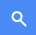
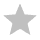
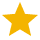

In [535]:
import requests
from bs4 import BeautifulSoup as bs

# need to split words multiple times into the fields



one = 'jacobs'
two = 'glassdoor'

# length plus 'glassdoor'

url = f'https://www.google.com/search?q={one}+{two}'
page = requests.get(url)

page.status_code
results = page.text

soup = BeautifulSoup(results, 'html.parser')
print(soup.prettify())

# div aria-label class=Hk2yDb KsR1A  (for glassdoor rating)


In [540]:
soup.find(class_='BNeawe s3v9rd AP7Wnd').get_text()

'Rating  4.0  (6,012) Jacobs has an overall rating of 4.0 out of 5, based on over 6,012 reviews left anonymously by employees. 81% of employees would recommend working at Jacobs to a\xa0...'

## implement into a for loop based on list -> then to df

### Ah, so growing a dataframe row-wise is a bad practice, whoops. Guess I need to change my approach

In [839]:
glassdoor = soup.find(class_='BNeawe s3v9rd AP7Wnd').get_text()

sample_list = ['Jacobs']
# sample = [pt.get_text() for pt in sample_list]

test_data = pd.DataFrame({'comp_name': ['jacobs', 'helm360', 'jobot'], 'location' : ['Atlanta, GA', 'Atlanta, GA', 'Atlanta, GA']})
test_data

comp_name_list = test_data['comp_name']
# must be outside of loop, otherwise it gets overwritten unfortunately
empty_arr = []

for i in comp_name_list:
    url = f'https://www.google.com/search?q={i}+glassdoor'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
#     print(soup.prettify())

#     empty_arr.append(soup.find(class_='BNeawe s3v9rd AP7Wnd').get_text())
    results = soup.find(class_='BNeawe s3v9rd AP7Wnd').get_text()
    index_slice = results.find('out of 5')
#     print(results[:index_slice])
    sliced_results = results[:index_slice]
#     data within an empty list, ready to be assigned in a df column
    empty_arr.append(sliced_results)
#     empty_arr += [sliced_results]
#     print(empty_arr)
#     assign this to existing sample dataframe
#     test_data['gd_ratings'] = empty_arr

# test_data
# print(test_data['comp_name'].iloc[0])



test_data['gd_ratings'] = empty_arr

test_data

AttributeError: 'NoneType' object has no attribute 'get_text'

## Aside from more string slicing to fully narrow down the rating, just need to refactor and implement into sample data

## Time to fiddle with baseline map data

In [674]:
test_data

,comp_name,location,gd_ratings
0,jacobs,"Atlanta, GA","Rating 4.0 (6,012) Jacobs has an overall rat..."
1,helm360,"Atlanta, GA",Rating 4.2 (179) Helm360 has an overall rati...


In [708]:
starting_address = 'from+Hmart+Duluth,+GA'
# hardcoded, will need to loop into 
target_address = test_data['comp_name'][0] + '+' + test_data['location'][0]
print(target_address)

jacobs+Atlanta, GA


In [680]:
map_url = f'https://www.google.com/search?q={target_address}/{starting_address}/'    

In [819]:
# for i in test_data:

# cannot use google maps from the start, bc javascript must be enabled. bs4 cannot scrape.
# use google search
map_url = f'https://www.google.com/search?q={target_address}+{starting_address}/'
page = requests.get(map_url)
soup = BeautifulSoup(page.text, 'html.parser')
# print(soup.prettify())
map_results = soup.find(class_='BNeawe deIvCb AP7Wnd').get_text()
# print(map_results)
index_beg_slice = map_results.find('(')
index_end_slice = map_results.find(' via')

print(map_results[index_beg_slice:index_end_slice])


In [731]:
# convert into iterative method with test data

In [808]:
# empty_map_arr = []

# for i in (test_data):
#     target_address = test_data['comp_name'][i] + '+' + test_data['location'][i]
#     map_url = f'https://www.google.com/search?q={target_address}/{starting_address}/'
#     page = requests.get(map_url)
#     soup = BeautfulSoup(page.text, 'html.parser')
#     map_results = soup.find(class_='BNeawe deIvCb AP7Wnd').get_text()
#     index_beg_slice = map_results.find('(')
#     index_end_slice = map_results.find(' via')
#     empty_map_arr.append(map_results[index_beg_slice:index_end_slice])
    
    
# print(map_results[index_beg_slice:index_end_slice])

KeyError: 'comp_name'

In [830]:
import requests
from bs4 import BeautifulSoup as bs

comp_name_arr = []
loc_arr = []

map_arr = []

# starting_address = 'directions+from+Hmart+Duluth,+GA'

for i in test_data['comp_name']:
    comp_name_arr.append(i)

for i in test_data['location']:
    loc_arr.append(i)

counter = 0

while counter < len(test_data):
    target_address = comp_name_arr[counter] + '+' + loc_arr[counter]
    map_url = f'https://www.google.com/search?q={target_address}/'
    page = requests.get(map_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    try:
        map_results = soup.find(class_='BNeawe s3v9rd AP7Wnd').get_text()
#         map_results = soup.find(class_='BNeawe deIvCb AP7Wnd').get_text()
    except: pass
    

#     index_beg_slice = map_results.find('(')
#     index_end_slice = map_results.find(' via')
#     map_arr.append(map_results[index_beg_slice:index_end_slice])
    counter += 1


    
# print(comp_name_arr)
# print(loc_arr)
print(map_results)






H Mart Duluth


In [838]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/602.2.14 (KHTML, like Gecko) Version/10.0.1 Safari/602.2.14'
headers = {'User-Agent': user_agent,'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}
target_address = comp_name_arr[0] + '+' + loc_arr[0]
map_url = f'https://www.google.com/search?q={target_address}/'
page = requests.get(map_url, headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())
map_results = soup.find(class_='BNeawe s3v9rd AP7Wnd')

# print(map_results)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="initial-scale=1" name="viewport"/>
  <title>
   https://www.google.com/search?q=jacobs+Atlanta,%20GA/
  </title>
 </head>
 <body onload="e=document.getElementById('captcha');if(e){e.focus();} if(solveSimpleChallenge) {solveSimpleChallenge(,);}" style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;">
  <div style="max-width:400px;">
   <hr noshade="" size="1" style="color:#ccc; background-color:#ccc;"/>
   <br/>
   <form action="index" id="captcha-form" method="post">
    <noscript>
     <div style="font-size:13px;">
      In order to continue, please enable javascript on your web browser.
     </div>
    </noscript>
    <script async="" defer="" src="https://www.google.com/recaptcha/api.js">
    </script>
    <script>
     var submitCallback = function(response) {documen